### Radolan DL

Install `wradlib` first.

For the library to work we need a `RADOLAN.cfg` file with the following fields:
```
[DEFAULT]
radolan_path = /path/to/base/Radolan
start_date = YYYY-MM-DD HH:MM:SS
end_date = YYYY-MM-DD HH:MM:SS
```

the dates must be between `2005-06-01 00:50:00` and `2019-12-31 23:50:00`.
These will also be the default dates in case something goes sideways.

As an example we will be taking the 10th of June 2019 at 8:50 UTC. Beware that
RADOLAN RW composites are available only at HH:50 times.

We will start by importing what we need:

In [1]:
import dwd_dl as dl
import datetime as dt

Followed by running the configuration and download and extraction functions.

In [2]:
dl.config.config_initializer('..')
dl.config.download_and_extract()

Total size is 29682453 bytes. Proceed? y/[n] y
Creating Temporary Directory
Temporary Directory created: True
Extracting all in RW-201906.tar.gz.
All extracted.


We choose the date:

In [3]:
ts = dt.datetime(2019, 6, 10, 8, 50)

And plot the output. The function `dl.img.selection(time_stamp)` outputs an `xarray.DataSet`.

Will not slice.


<xarray.Dataset>
Dimensions:  (x: 900, y: 900)
Coordinates:
    time     datetime64[ns] ...
  * x        (x) float64 -523.5 -522.5 -521.5 -520.5 ... 372.5 373.5 374.5 375.5
  * y        (y) float64 -4.659e+03 -4.658e+03 ... -3.761e+03 -3.76e+03
Data variables:
    RW       (y, x) float32 ...

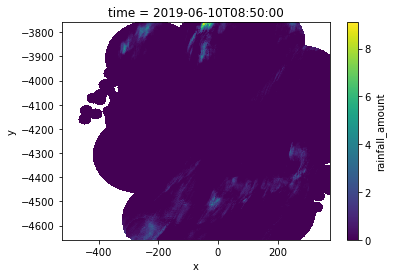

In [4]:
dl.img.selection(ts)

A selection of the above is simple:

<xarray.Dataset>
Dimensions:  (x: 200, y: 200)
Coordinates:
    time     datetime64[ns] ...
  * x        (x) float64 -99.46 -98.46 -97.46 -96.46 ... 96.54 97.54 98.54 99.54
  * y        (y) float64 -4.6e+03 -4.599e+03 ... -4.402e+03 -4.401e+03
Data variables:
    RW       (y, x) float32 ...

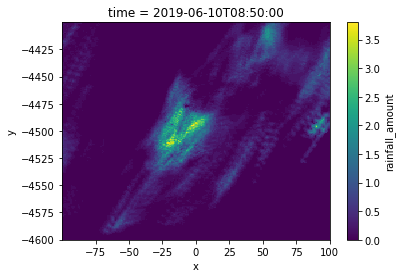

In [5]:
bottom_left = (-100, -4600)
top_right = (100, -4400)
dl.img.selection(ts, bl_coords=bottom_left, tr_coords=top_right)

A simple array can be obtained using the `xarray.DataSet` and `xarray.DataArray` attributes:

In [6]:
dl.img.selection(ts, bl_coords=bottom_left, tr_coords=top_right, plot=False).RW.data

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.2, 0.1, ..., 0. , 0.1, 0. ],
       [0.2, 0.1, 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0.1, ..., 0. , 0. , 0. ]], dtype=float32)